##### Importing Libraries and data

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
sns.set_style("darkgrid")

In [178]:
iris = pd.read_csv('data/iris.csv')

##### Visualizing the data

In [179]:
iris.shape

(150, 5)

In [180]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


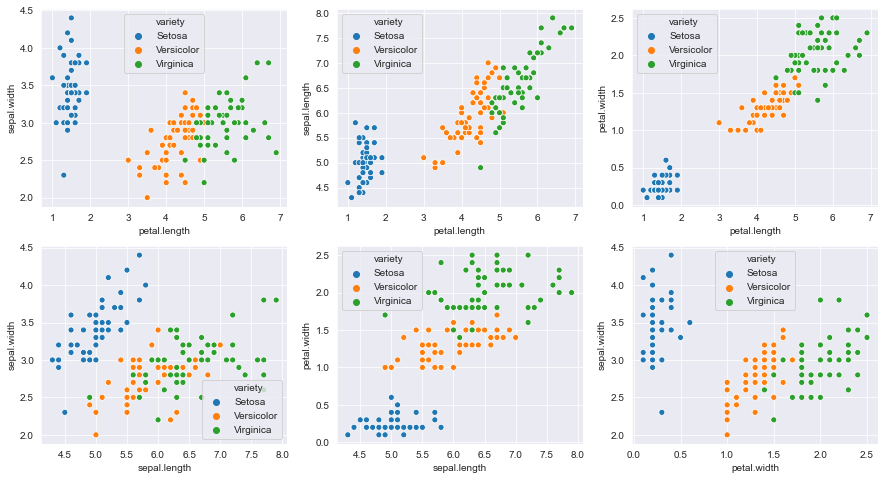

In [181]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

sns.scatterplot(ax=axes[0,0], data=iris,x='petal.length',y='sepal.width',hue='variety')
sns.scatterplot(ax=axes[0,1], data=iris,x='petal.length',y='sepal.length',hue='variety')
sns.scatterplot(ax=axes[0,2], data=iris,x='petal.length',y='petal.width',hue='variety')
sns.scatterplot(ax=axes[1,0], data=iris,x='sepal.length',y='sepal.width',hue='variety')
sns.scatterplot(ax=axes[1,1], data=iris,x='sepal.length',y='petal.width',hue='variety')
sns.scatterplot(ax=axes[1,2], data=iris,x='petal.width',y='sepal.width',hue='variety')

##### Processing the data

In [182]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(iris,test_size=0.3)

In [183]:
train = x.to_numpy()
test = y.to_numpy()

##### Euclidian Distances

In [184]:
def distanciaEuclidiana(row1, row2):
    distancia = 0.0
    for i in range(len(row1)-1):
        distancia += (row1[i] - row2[i]) ** 2
    return sqrt(distancia)

##### Getting the neighbors

In [185]:
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        dist = distanciaEuclidiana(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

##### KNN Classifier

In [186]:
def KNNClassification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

###### Making Predictions

In [187]:
def predict(train, test, k):
    colunas = ["Virginica","Setosa","Versicolor"]
    confusion_matrix = pd.DataFrame(0, index=colunas, columns=colunas)
    inputData = []
    predictedData = []

    for i in range(len(test)):
        resultado = KNNClassification(train, test[i], k)
        inputData.append(test[i][-1])
        predictedData.append(resultado)
        confusion_matrix.loc[test[i][-1], resultado] = confusion_matrix.loc[test[i][-1], resultado] + 1
    return inputData, predictedData,confusion_matrix

In [188]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### K = 1

In [193]:
input1, predicted1, cm1 = predict(train,test,1) # k = 1

print('Confusion Matrix :\n')
print(cm1)

print("\nAcurácia: ", accuracy_score(input1, predicted1))
print("Recall: ", recall_score(input1, predicted1, average=None))
print("Precisão: ", precision_score(input1, predicted1, average=None))
print("F-score: ", f1_score(input1, predicted1, average=None))

Confusion Matrix :

            Virginica  Setosa  Versicolor
Virginica          11       0           1
Setosa              0      16           0
Versicolor          0       0          17

Acurácia:  0.9777777777777777
Recall:  [1.         1.         0.91666667]
Precisão:  [1.         0.94444444 1.        ]
F-score:  [1.         0.97142857 0.95652174]


### K = 3

In [194]:
input3, predicted3, cm3 = predict(train,test,3) # k = 3

print('Confusion Matrix :\n')
print(cm3)

print("\nAcurácia: ", accuracy_score(input3, predicted3))
print("Recall: ", recall_score(input3, predicted3, average=None))
print("Precisão: ", precision_score(input3, predicted3, average=None))
print("F-score: ", f1_score(input3, predicted3, average=None))

Confusion Matrix :

            Virginica  Setosa  Versicolor
Virginica          11       0           1
Setosa              0      16           0
Versicolor          0       0          17

Acurácia:  0.9777777777777777
Recall:  [1.         1.         0.91666667]
Precisão:  [1.         0.94444444 1.        ]
F-score:  [1.         0.97142857 0.95652174]


### K = 5

In [195]:
input5, predicted5, cm5 = predict(train,test,5) # k = 5

print('Confusion Matrix :\n')
print(cm5)

print("\nAcurácia: ", accuracy_score(input5, predicted5))
print("Recall: ", recall_score(input5, predicted5, average=None))
print("Precisão: ", precision_score(input5, predicted5, average=None))
print("F-score: ", f1_score(input5, predicted5, average=None))

Confusion Matrix :

            Virginica  Setosa  Versicolor
Virginica          11       0           1
Setosa              0      16           0
Versicolor          0       0          17

Acurácia:  0.9777777777777777
Recall:  [1.         1.         0.91666667]
Precisão:  [1.         0.94444444 1.        ]
F-score:  [1.         0.97142857 0.95652174]


### K = 7

In [196]:
input7, predicted7, cm7 = predict(train,test,7) # k = 7

print('Confusion Matrix :\n')
print(cm7)

print("\nAcurácia: ", accuracy_score(input7, predicted7))
print("Recall: ", recall_score(input7, predicted7, average=None))
print("Precisão: ", precision_score(input7, predicted7, average=None))
print("F-score: ", f1_score(input7, predicted7, average=None))

Confusion Matrix :

            Virginica  Setosa  Versicolor
Virginica          12       0           0
Setosa              0      16           0
Versicolor          0       0          17

Acurácia:  1.0
Recall:  [1. 1. 1.]
Precisão:  [1. 1. 1.]
F-score:  [1. 1. 1.]
